<h1 align="center">
  <b>Universidad Autónoma de Chihuahua</b>
</h1>
<h2 align="center">
  <b>Facultad de Ingeniaría</b>
</h2>
<br>
<p align = "center">
  <a href="https://sega.uach.mx/">
     <img src="https://drive.google.com/uc?id=1n8NdPSF4WAZRxVomm74jf0zLU9ibdxqT">
  </a>
</p>

<h1 align="center">
  <b>Clasificador de calidad de vino tinto</b>
</h1>
<br>

<h2 align="center">
  <b>Cómputo Paralelo y Distribuido</b>
</h2>

<h3 align="center">
  <b>Proyecto Tercer Parcial</b>
</h3>
<br>

<p align="center">
  <b>Alumnos: </b>
  <br>
  José Carlos Chaparro Morales - 329613
  <br>
  Juan Luis Del Valle Sotelo - 338912 
  <br>
  Dante Yahír Rodríguez Herrera - 338725
</p>
<p align="center">
  <b>Profesor:</b>
  Jesús Roberto López Santillán
</p>
<br>

<p align="center">
  <b>Github:</b>
  <a href='https://github.com/mus1cian/Wine-Quality-Prediction' >WineClassifier</a>
</p>
<p align="center">
  <b>Deployment:</b>
  <a href='https://mus1cian-wine-quality-prediction-app-dck61g.streamlit.app/' >Streamlit</a>
</p>

<p align="left">
  A lunes 24 de abril de 2023
</p>

# 1. Variable Declaration

In [2]:
test_set_size = 20 #@param {type:"slider", min:0, max:50, step:1}

#2. Get the Data

##2.1 Download the Data

In [3]:
# Code to read csv file into Colaboratory:
import pandas as pd

red_wine = pd.read_csv('winequality-red.csv')

##2.2 Load and look at the data

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##2.3 Create a Test Set

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##2.4 Representative Test Set

<Axes: >

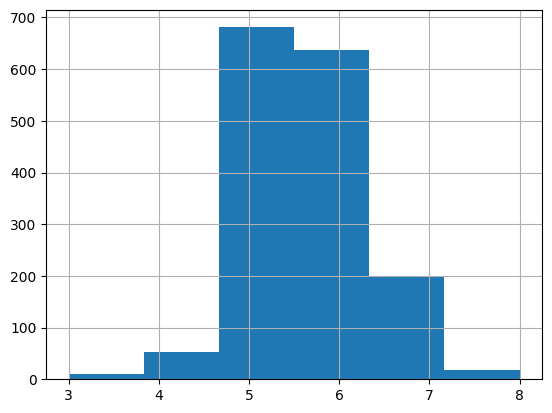

In [7]:
red_wine["quality"].hist(bins = 6)

#3. Discover and Visualize the Data to Gain Insights

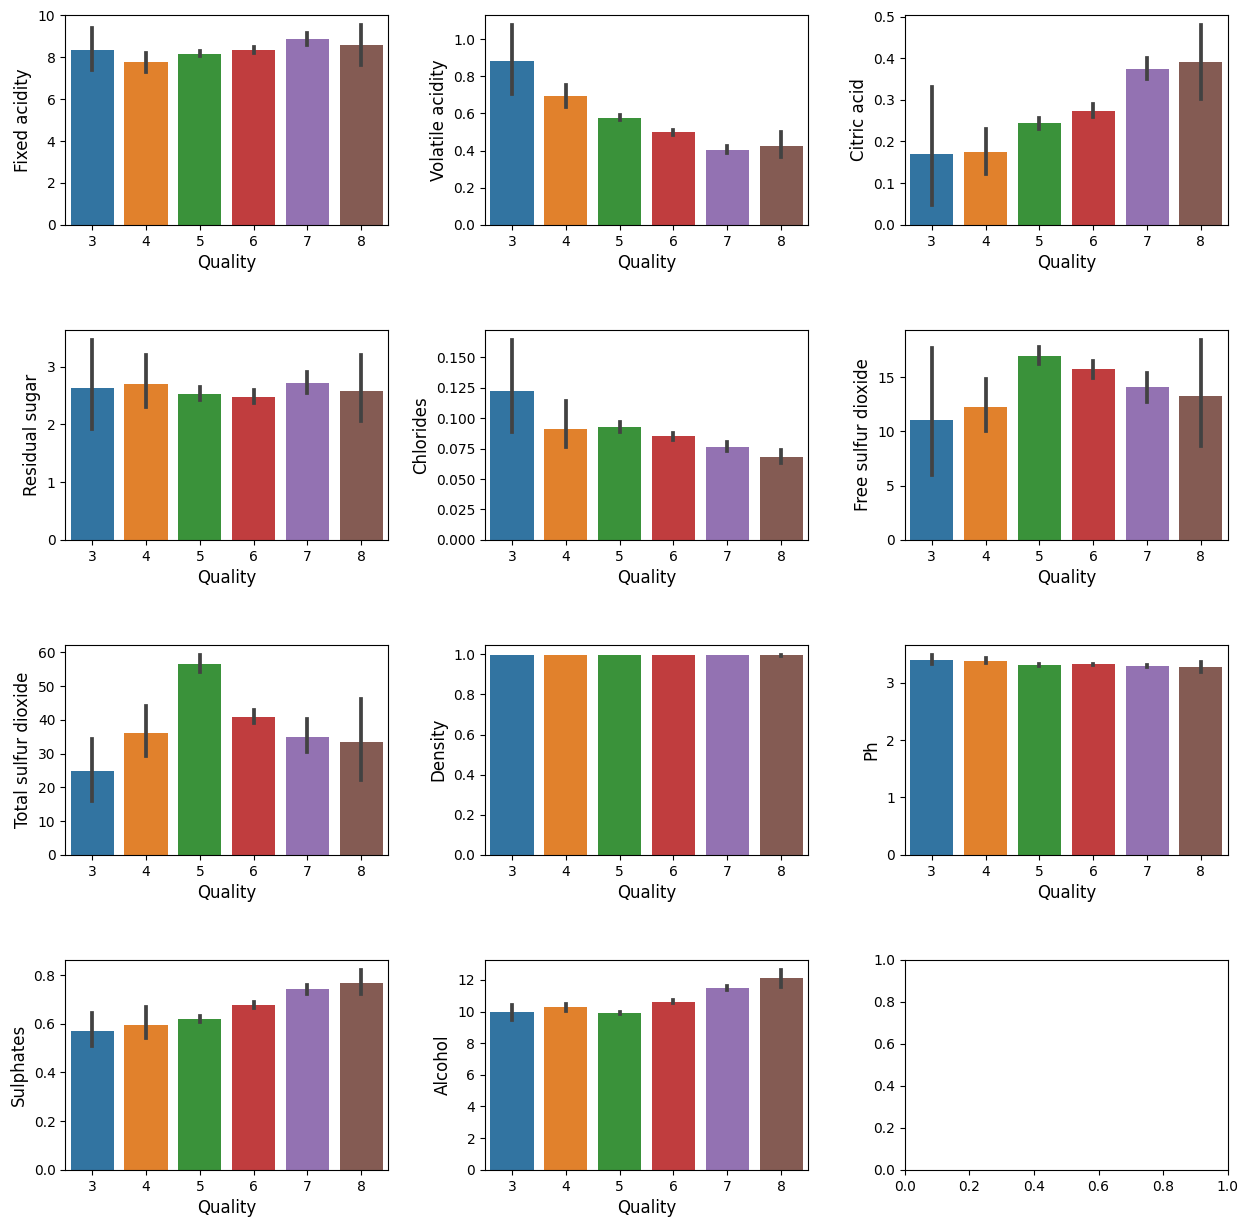

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

for i, column in enumerate(red_wine.columns[:-1]):
    row = i // 3
    col = i % 3
    sns.barplot(x='quality', y=column, data=red_wine, ax=axes[row, col])
    axes[row, col].set_xlabel('Quality', fontsize=12)
    axes[row, col].set_ylabel(column.capitalize(), fontsize=12)

plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

# 4. Prepare the data for Machine Learning Algorithms


## 4.1 Classifying quality and assigning labels

In [9]:
bins = (2, 5, 6, 8)
group_names = ['bad', 'average', 'good']
red_wine['quality'] = pd.cut(red_wine['quality'], bins = bins, labels = group_names)

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_quality = LabelEncoder()

In [11]:
red_wine['quality'] = label_quality.fit_transform(red_wine['quality'])

In [12]:
red_wine['quality'].value_counts()

quality
1    744
0    638
2    217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

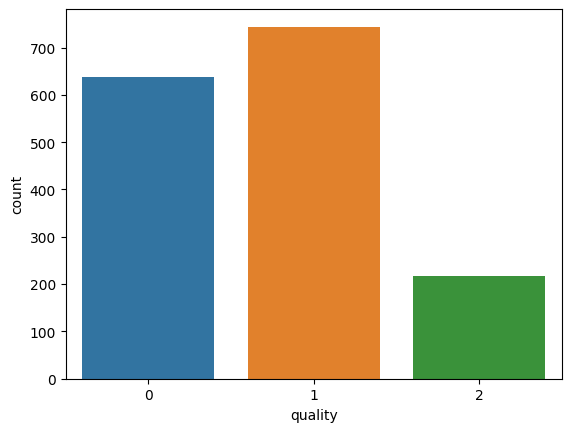

In [13]:
sns.countplot(x='quality', data=red_wine, order=[0,1,2])


In [14]:
red_wine['quality']
print(red_wine['quality'])
print(type(red_wine['quality']))

0       1
1       1
2       1
3       0
4       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1599, dtype: int32
<class 'pandas.core.series.Series'>


In [15]:
array = red_wine['quality']
print(array)
c = array.value_counts()[0]

print(c)

0       1
1       1
2       1
3       0
4       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1599, dtype: int32
638


In [16]:
X = red_wine.drop('quality', axis = 1)
y = red_wine['quality'].copy()

In [17]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [18]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=test_set_size, random_state=42)

for train_index, test_index in strat_shuff_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

## 4.2 Transformation Pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [20]:
full_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

red_wine_prepared = full_pipeline.fit_transform(X_train)
red_test = full_pipeline.transform(X_test)

In [21]:
red_wine_prepared[0]

array([-0.98963013,  1.10270258, -0.36513127,  3.75716056, -0.30866228,
        1.25019964,  0.98477552,  0.5061313 , -0.13280162, -0.69577545,
       -1.1493235 ])

In [22]:
red_test[0]

array([-0.58702489, -0.09922057, -0.46795671, -0.31139212, -0.37210365,
       -0.37038704, -0.56106156,  0.49551588,  1.36083617,  0.42353172,
       -0.86688916])

# 5. Select and Train a Model

##5.1 Extra Trees

### 5.1.1 Extra Trees Grid-Search - Sequential

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
import time

start_time = time.time()

param_grid = [
    {'criterion': ['gini', 'entropy', 'log_loss'],
     'bootstrap': [False, True],
     'max_features': ['sqrt', 'log2'],
     'n_estimators': [50, 100, 200],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]}
]

extra_reg = ExtraTreesClassifier()

grid_search = GridSearchCV(extra_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=1, verbose = 2)

grid_search.fit(red_wine_prepared, y_train)

end_time = time.time()
execution_time_sequential = end_time - start_time
print("Tiempo de ejecución: {} segundos".format(execution_time_sequential))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

In [24]:
extra_best_search = grid_search.best_estimator_

In [25]:
import numpy as np
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.749073501808141 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.7153446039153534 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.7100090981314079 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.7245792360528052 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
0.7126684524280533 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.7184234184361786 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.741850100241044 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', '

In [26]:
extra_grid_search_results = [[],[]]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  extra_grid_search_results[0].append(np.sqrt(-mean_score))
  extra_grid_search_results[1].append(params)
extra_grid_search_results
print(min(extra_grid_search_results[0]))
print(extra_grid_search_results[1][extra_grid_search_results[0].index(min(extra_grid_search_results[0]))])

0.7014952886112217
{'bootstrap': False, 'criterion': 'log_loss', 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


#### 5.1.1.1 Extra Trees Grid-Search Metrics

In [27]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(extra_best_search, red_wine_prepared, y_train,
                        scoring="accuracy", cv=5)

accuracy

array([0.70886076, 0.70886076, 0.75      , 0.68670886, 0.72698413])

In [28]:
y_pred = extra_best_search.predict(red_test)

In [29]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average = 'macro')

0.7833333333333333

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.6944444444444443

In [31]:
from sklearn.metrics import f1_score
f1scoreextra = f1_score(y_test, y_pred, average='macro')
f1scoreextra

0.7241830065359478

In [32]:
y_pred_proba = extra_best_search.predict_proba(red_test)

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

0.8812636165577342

In [34]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[6, 2, 0],
       [3, 6, 0],
       [1, 0, 2]], dtype=int64)

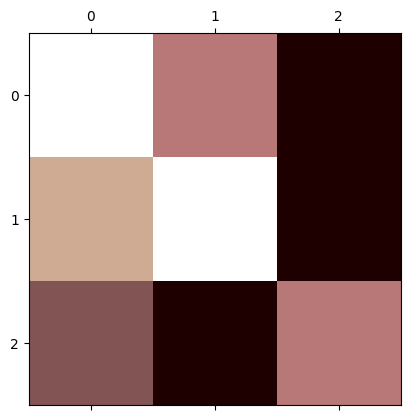

In [35]:
plt.matshow(conf_mx, cmap=plt.cm.pink)
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.75      0.67      0.71         9
           2       1.00      0.67      0.80         3

    accuracy                           0.70        20
   macro avg       0.78      0.69      0.72        20
weighted avg       0.73      0.70      0.70        20



In [37]:


accuracy_trees = cross_val_score(extra_best_search, red_test, y_test,
                        scoring="accuracy", cv=5)

print("Accuracy with hyperparameters: " + str(accuracy_trees))

print("F1 Score with hyperparameters: " + str(f1scoreextra))

c:\Users\luis_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy with hyperparameters: [0.75 0.75 0.25 0.5  0.75]
F1 Score with hyperparameters: 0.7241830065359478


### 5.1.2 Extra Trees Grid-Search - Parallel

In [38]:
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

param_grid = [
    {'criterion': ['gini', 'entropy', 'log_loss'],
     'bootstrap': [False, True],
     'max_features': ['sqrt', 'log2'],
     'n_estimators': [50, 100, 200],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]}
]

extra_reg = ExtraTreesClassifier()

grid_search_parallel = GridSearchCV(extra_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs = -1)

grid_search_parallel.fit(red_wine_prepared, y_train)
end_time = time.time()
execution_time_parallel = end_time - start_time
print("Tiempo de ejecución: {} segundos".format(execution_time_parallel))

Tiempo de ejecución: 119.64504718780518 segundos


In [39]:
extra_best_search_parallel = grid_search_parallel.best_estimator_

In [40]:
cvres = grid_search_parallel.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.7201985527580684 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.7068666338248456 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.7223880429722621 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.7362741734087733 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
0.7166565035656017 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.7241631698479254 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.7456955710405417 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt',

In [41]:
extra_grid_search_results_parallel = [[],[]]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  extra_grid_search_results_parallel[0].append(np.sqrt(-mean_score))
  extra_grid_search_results_parallel[1].append(params)
extra_grid_search_results_parallel
print(min(extra_grid_search_results_parallel[0]))
print(extra_grid_search_results_parallel[1][extra_grid_search_results_parallel[0].index(min(extra_grid_search_results_parallel[0]))])

0.6992102091763504
{'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


#### 5.1.1.1 Extra Trees Grid-Search Metrics

In [42]:
accuracy_parallel = cross_val_score(extra_best_search_parallel, red_wine_prepared, y_train,
                        scoring="accuracy", cv=5)

accuracy

array([0.70886076, 0.70886076, 0.75      , 0.68670886, 0.72698413])

In [43]:
y_pred_parallel = extra_best_search_parallel.predict(red_test)

In [44]:
precision_score(y_test, y_pred_parallel, average = 'macro')

0.7833333333333333

In [45]:
recall_score(y_test, y_pred_parallel, average='macro')

0.6944444444444443

In [46]:
f1scoreextra_parallel = f1_score(y_test, y_pred_parallel, average='macro')
f1scoreextra_parallel

0.7241830065359478

In [47]:
y_pred_proba_parallel = extra_best_search_parallel.predict_proba(red_test)

In [48]:
roc_auc_score(y_test, y_pred_proba_parallel, multi_class='ovr')

0.883918845315904

In [49]:
conf_mx_parallel = confusion_matrix(y_test, y_pred)
conf_mx_parallel

array([[6, 2, 0],
       [3, 6, 0],
       [1, 0, 2]], dtype=int64)

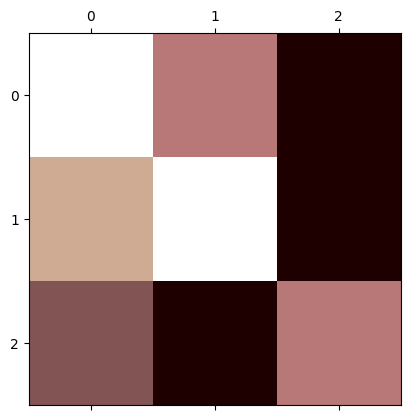

In [50]:
plt.matshow(conf_mx_parallel, cmap=plt.cm.pink)
plt.show()

In [51]:
print(classification_report(y_test, y_pred_parallel))


              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.75      0.67      0.71         9
           2       1.00      0.67      0.80         3

    accuracy                           0.70        20
   macro avg       0.78      0.69      0.72        20
weighted avg       0.73      0.70      0.70        20



In [52]:
accuracy_trees_parallel = cross_val_score(extra_best_search, red_test, y_test,
                        scoring="accuracy", cv=5)

print("Accuracy with hyperparameters: " + str(accuracy_trees_parallel))

print("F1 Score with hyperparameters: " + str(f1scoreextra_parallel))

c:\Users\luis_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy with hyperparameters: [0.75 0.75 0.25 0.5  0.75]
F1 Score with hyperparameters: 0.7241830065359478


#6. Results

In [53]:
print("Extra Trees Classifier - Sequential: ",  min(extra_grid_search_results[0]))
print("Extra Trees F1 Score - Sequential", f1scoreextra)

print("Extra Trees Classifier - Parallel: ",  min(extra_grid_search_results_parallel[0]))
print("Extra Trees F1 Score - Parallel", f1scoreextra_parallel)


print("\n\nBest F1 Score: ", max(f1scoreextra, f1scoreextra_parallel))
print("Extra Trees Classifier")

Extra Trees Classifier - Sequential:  0.7014952886112217
Extra Trees F1 Score - Sequential 0.7241830065359478
Extra Trees Classifier - Parallel:  0.6992102091763504
Extra Trees F1 Score - Parallel 0.7241830065359478


Best F1 Score:  0.7241830065359478
Extra Trees Classifier


#7. Export Model

In [54]:
import joblib
joblib.dump (extra_best_search, "my_model.pkl")

['my_model.pkl']

In [55]:
import tensorflow as tf

try:
    # Verificar si se está utilizando una TPU
    tpua = tf.distribute.cluster_resolver.TPUClusterResolver()
    if tpua.master():
        print('Se está utilizando TPU')
except ValueError:
    # Verificar si se está utilizando una GPU
    if tf.config.list_physical_devices('GPU'):
        print('Se está utilizando GPU')
    else:
        print('No se está utilizando TPU ni GPU')


No se está utilizando TPU ni GPU


In [56]:
import psutil

# Obtener información sobre el CPU
cpu_info = {
    'Nombre': 'Intel i5 8th Gen',
    'Frecuencia': '',
    'Núcleos físicos': '',
    'Núcleos lógicos': ''
}

# Obtener la frecuencia del CPU
cpu_info['Frecuencia'] = psutil.cpu_freq().current if psutil.cpu_freq().current else 'Desconocida'


# Obtener el número de núcleos físicos y lógicos del CPU
cpu_info['Núcleos físicos'] = psutil.cpu_count(logical=False)
cpu_info['Núcleos lógicos'] = psutil.cpu_count(logical=True)

# Imprimir la información del CPU
for key, value in cpu_info.items():
    print(key + ':', value)


print("Tiempo de ejecución en cómputo secuencial", execution_time_sequential)
print("Tiempo de ejecución en cómputo paralelo", execution_time_parallel)


Nombre: Intel i5 8th Gen
Frecuencia: 2301.0
Núcleos físicos: 4
Núcleos lógicos: 8
Tiempo de ejecución en cómputo secuencial 404.5236232280731
Tiempo de ejecución en cómputo paralelo 119.64504718780518


#8. Conclusions

La matriz de confusión y el classification report de SVC sugieren que el modelo ha obtenido una precisión moderada en la clasificación de las muestras en las tres clases. La matriz de confusión muestra que el modelo ha clasificado correctamente la mayoría de las muestras de la clase 0 y 1, pero ha tenido dificultades en la clasificación de la clase 2, con solo 2 de las 3 muestras clasificadas correctamente. En general, el modelo SVM ha logrado una precisión aceptable en la clasificación de las muestras en las tres clases, con un F1 score de 0.724183006535947 con hiperparámetros. 

Random Forest ha logrado una precisión razonable en las tres clases. De los 8 casos de la clase 0, el modelo ha clasificado correctamente 6 de ellos, pero ha clasificado incorrectamente 2 casos de la clase 0. De los 9 casos de la clase 1, el modelo ha clasificado correctamente 6 de ellos y ha clasificado incorrectamente 3 casos de la clase 1. De los 3 casos de la clase 2, el modelo ha clasificado correctamente 2 de ellos y ha clasificado incorrectamente 1 caso de la clase 2. En general, el modelo Random Forest ha logrado una precisión aceptable en la clasificación de las tres clases.

Extra Trees ha clasificado correctamente 6 de los 8 casos de la clase 0 y ha clasificado incorrectamente 2 de ellos como pertenecientes a la clase 1. Además, ha clasificado correctamente 6 de los 9 casos de la clase 1 y ha clasificado incorrectamente 3 de ellos como pertenecientes a la clase 0. Finalmente, el modelo ha clasificado correctamente 2 de los 3 casos de la clase 2 y ha clasificado incorrectamente 1 de ellos como perteneciente a la clase 0. En general, el modelo tiene un rendimiento aceptable en la clasificación de las tres clases, aunque puede haber margen de mejora, especialmente en la clasificación de los casos de la clase 0 y 1, donde se producen las principales confusiones.

